{'status': 'Running'}
{'status': 'Succeeded', 'recognitionResults': [{'page': 1, 'clockwiseOrientation': 0.91, 'width': 714, 'height': 952, 'unit': 'pixel', 'lines': [{'boundingBox': [72, 38, 365, 30, 366, 68, 73, 76], 'text': 'Jules Basics Summery', 'words': [{'boundingBox': [77, 42, 137, 38, 139, 74, 80, 76], 'text': 'Jules', 'confidence': 'Low'}, {'boundingBox': [144, 38, 233, 34, 234, 72, 146, 74], 'text': 'Basics'}, {'boundingBox': [240, 34, 367, 34, 366, 70, 240, 72], 'text': 'Summery', 'confidence': 'Low'}]}, {'boundingBox': [67, 64, 664, 79, 663, 118, 66, 102], 'text': "> git clone clones repository cuter it's made", 'words': [{'boundingBox': [73, 75, 91, 74, 92, 102, 74, 103], 'text': '>', 'confidence': 'Low'}, {'boundingBox': [98, 74, 141, 73, 141, 100, 99, 102], 'text': 'git', 'confidence': 'Low'}, {'boundingBox': [153, 72, 225, 71, 226, 99, 154, 100], 'text': 'clone'}, {'boundingBox': [267, 71, 345, 72, 345, 99, 268, 99], 'text': 'clones', 'confidence': 'Low'}, {'boundingBo

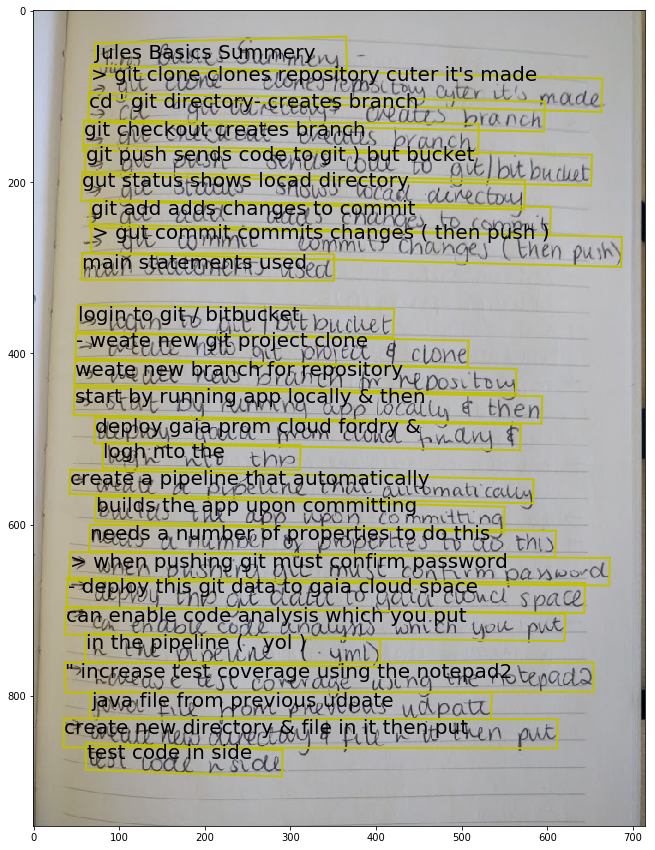

In [3]:
import requests
import time
# If you are using a Jupyter notebook, uncomment the following line.
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
from io import BytesIO

# Replace <Subscription Key> with your valid subscription key.
subscription_key = "1de9548a300042d1a8c5bf4d1f8233b6"
assert subscription_key

# You must use the same region in your REST call as you used to get your
# subscription keys. For example, if you got your subscription keys from
# westus, replace "westcentralus" in the URI below with "westus".
#
# Free trial subscription keys are generated in the "westus" region.
# If you use a free trial subscription key, you shouldn't need to change
# this region.
vision_base_url = "https://westcentralus.api.cognitive.microsoft.com/vision/v2.0/"

text_recognition_url = vision_base_url + "read/core/asyncBatchAnalyze"

# Set image_url to the URL of an image that you want to analyze.
image_url = "https://lh3.googleusercontent.com/RdyQD0erTnRxTKTHX_gr2__RVJEThbLyR1-GQT4OLzCQ4vVUUHlAQ8Uzls5f_RWJWgPB1M5miXbp8PU_i-WBuSFtB_6cbiPaqaYnZ2gvgU1Bsrlzpk1fHa2toMtU-jF-sJxo3EfA5URi_yLQcx118xkbtHXgGBpc7i-X6ics30dPmeeG0DfELfSYxQeEqQzN1M9XCDi9yoHtBfClwEWm2zibs1jqyC9QMTAOwIQ-K2B0YsAZyZlqqCJTMkk1LHyT22-yF4P4tavQ2vWIlt8cVBS3CWyPn91gFWZQfx93HzGoo5T16XDY_hrji767aKfWsZ63wvUdMsb1TrklOowxKdpfYop9FoOttF5r2nZlvjb12rxW7d-cKzxSmRSjOmDJGsgF_hMCc1N0fa0EW6EkWQU3IK_4juFZzOYRdhl4q3NDLCICXBusM7zKqFRav5ozaANIQngmVc0ONNWU1PvIpNVEClMmQ3Jmz5DCTAPGzbEecAnZ7ExjNkBOdZuS2VqncrJlAX-VcrHpXmli1rZM9yM1ITLwAjrl3n08IJsnan06Jo6gj4RhBf8yuqGJnDEiePHDLXVgPjP3zjV5Uigkxd0P8V0RtgmUI-PBnIeUNbuDbAvuA56yVMFtwp7SvppyTo5dYuGz7dYhmhSM6TCTT_Iu5ao_vQkJqr5PEHUltBCBy19mugSZqkdQ55NBMJRtZkgc04bNeh_8P3RtN57JspwM=w714-h952-no"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
data = {'url': image_url}
response = requests.post(
    text_recognition_url, headers=headers, json=data)
response.raise_for_status()

# Extracting handwritten text requires two API calls: One call to submit the
# image for processing, the other to retrieve the text found in the image.

# Holds the URI used to retrieve the recognized text.
operation_url = response.headers["Operation-Location"]

# The recognized text isn't immediately available, so poll to wait for completion.
analysis = {}
poll = True
while (poll):
    response_final = requests.get(
        response.headers["Operation-Location"], headers=headers)
    analysis = response_final.json()
    print(analysis)
    time.sleep(1)
    if ("recognitionResults" in analysis):
        poll = False
    if ("status" in analysis and analysis['status'] == 'Failed'):
        poll = False

polygons = []
if ("recognitionResults" in analysis):
    # Extract the recognized text, with bounding boxes.
    polygons = [(line["boundingBox"], line["text"])
                for line in analysis["recognitionResults"][0]["lines"]]

# Display the image and overlay it with the extracted text.
plt.figure(figsize=(15, 15))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image)
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1])
                for i in range(0, len(polygon[0]), 2)]
    text = polygon[1]
    patch = Polygon(vertices, closed=True, fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=20, va="top")

